<a href="https://colab.research.google.com/github/javadasoodeh/Kaggle-Practice-Notebooks/blob/main/HealthCareCostPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Health Care Cost Prediction with Linear Regression Models



## Libraries Installation
### Explanation of the Installation Command

The command: `!pip install pandas plotnine`
is used to install three Python libraries using `pip`, which is the Python package installer.

#### Components of the Command

- `!`: This character is often used in Jupyter notebooks and some other interactive environments to execute shell commands from within the code cell.

- `pip`: The Python package installer that allows you to install and manage additional libraries that are not part of the Python standard library.

- `install`: A command used with `pip` to install packages.

- `pandas`: A powerful library providing data structures and data analysis tools for Python.

- `plotnine`: A library based on 'ggplot2' in R that provides a declarative syntax to construct statistical graphics in Python.


#### Purpose of Each Library

1. **Pandas**: Used for data manipulation and analysis. It offers data structures like DataFrames, which make it easy to handle structured data.

2. **Plotnine**: Used for creating complex statistical plots based on a grammar of graphics. This library allows users to build plots layer by layer.


In [ ]:
!pip install pandas plotnine

## Libraries Importation

- **Pandas** is often used for reading, writing, and processing structured data formats like CSV, JSON, and SQL databases.
- **NumPy** is essential for performing mathematical operations on large, multi-dimensional arrays and matrices.
- **Plotnine** is used for creating complex, publication-quality graphical plots.
- **IPython.display** enhances the interactivity of Jupyter notebooks by allowing enhanced display capabilities for complex outputs.



In [18]:
import pandas as pd
import numpy as np
from plotnine import *
from IPython.display import display

## Setting Seed and Data Import

**np.random.seed(123)**: Sets the seed for numpy's random number generator to 123. This is used to ensure reproducibility of the data sampling processes.

**file_path = '/content/sample_data/insurance.csv'**: Defines the file path where the CSV file is stored. This path is typically specific to the environment (like Google Colab in this case).

**data = pd.read_csv(file_path)**: Reads the CSV file at the given file path into a pandas DataFrame. This DataFrame now holds all the data contained in the CSV file.

**data.head()**: Displays the first five rows of the DataFrame. This is useful for quickly checking the contents of the file, including column headers and sample data.




In [32]:
np.random.seed(123)
# Construct the file path
file_path = '/content/sample_data/insurance.csv'
data = pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Understanding and Describing the Data


- **Age**: Age of the insurance contractor, in years.

- **Sex**: Gender of the insurance contractor. Options: [female, male].

- **BMI**: Body Mass Index, providing an understanding of body weight that is relatively high or low relative to height. It is an objective index of body weight (kg/m²) using the ratio of height to weight. The ideal range is 18.5 to 24.9.
  
  ![BMI Chart](https://www.ncbi.nlm.nih.gov/books/NBK535456/bin/640px-Bmi-chart_colored.jpg)

- **Children**: Number of children covered by health insurance or number of dependents.

- **Smoker**: Smoking status of the insurance contractor. Options: [yes, no].

- **Region**: The beneficiary's residential area in the US. Options: [northeast, southeast, southwest, northwest].

- **Charges**: Individual medical costs billed by health insurance. This is the predicted value in dollars.

## Code Explaination

This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution. Let's break down what each row in this output represents:

**count**: Shows the number of non-null entries in each column.

**unique**: Displays the number of unique values in each column. Only
applicable to columns that contain non-numeric data.

**top**: The most common value in each column. Again, only relevant for non-numeric data.

**freq**: The most common value’s frequency of occurrence.

**mean**: The average value of each numeric column.

**std** (standard deviation): Measures the amount of variation or dispersion of a set of values.

**min**: The smallest value in each column.

**25%** (first quartile): The value below which 25% of the data falls.

**50%** (median, second quartile): The middle value of the dataset.

**75%** (third quartile): The value below which 75% of the data falls.

**max**: The largest value in each column.

### Column Details:

**age** Numerical; thus, all statistical metrics (like mean, std) are shown.

**sex: Categorical with 2 unique values (male, female), showing the most common **value** (male) and its frequency.

**bmi**: Numerical, showing standard numerical statistics.

**children**: Numerical, detailing standard metrics.

**smoker**: Categorical with 2 unique values (yes, no), top value being no.

**region**: Categorical with 4 unique values, the most common being southeast.

**charges**: Numerical, displaying a range of statistical details.


In [33]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Exploratory Data Analysis (EDA)


### 1. Correlation between Charges and Age / BMI

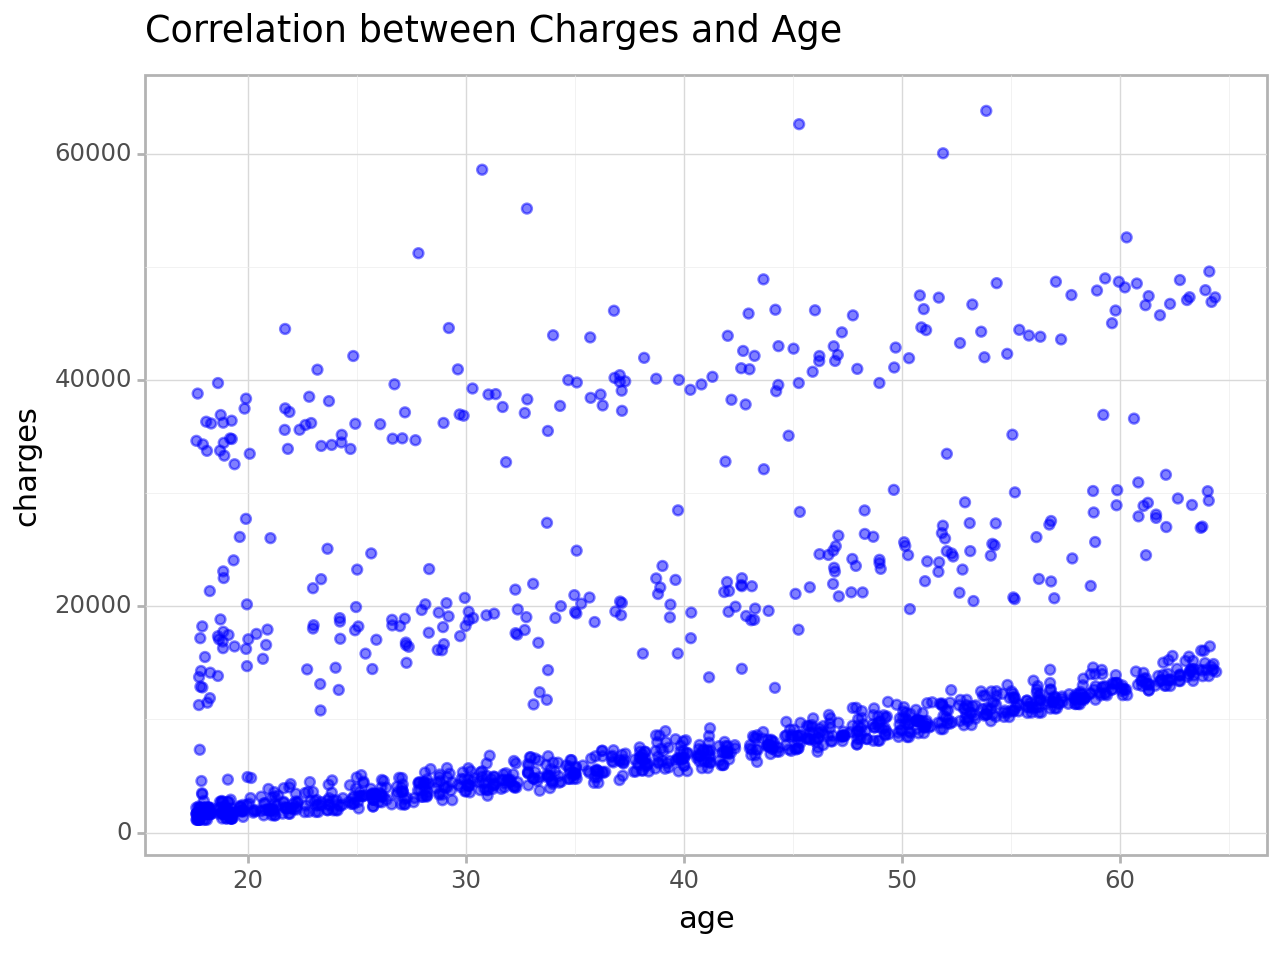

<Figure Size: (640 x 480)>

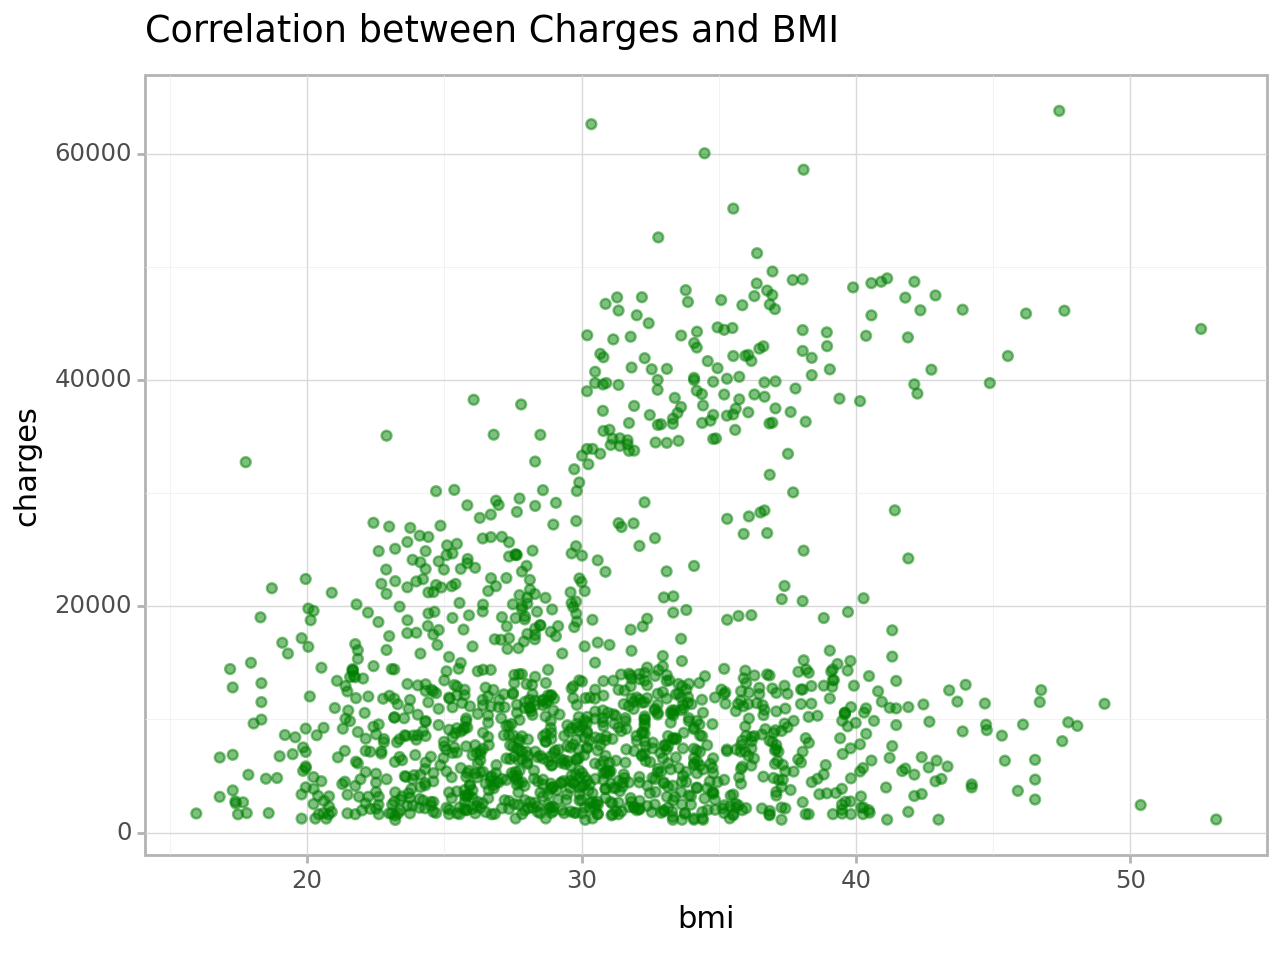

<Figure Size: (640 x 480)>

In [20]:
# Plot 1: Charges and Age / BMI
p1 = (ggplot(data, aes('age', 'charges')) +
      geom_jitter(color="blue", alpha=0.5) +
      theme_light() +
      ggtitle("Correlation between Charges and Age"))

p2 = (ggplot(data, aes('bmi', 'charges')) +
      geom_jitter(color="green", alpha=0.5) +
      theme_light() +
      ggtitle("Correlation between Charges and BMI"))

# Display plots together with a title
display(p1, p2)


### 2. Correlation between Charges and Sex / Children covered by insurance

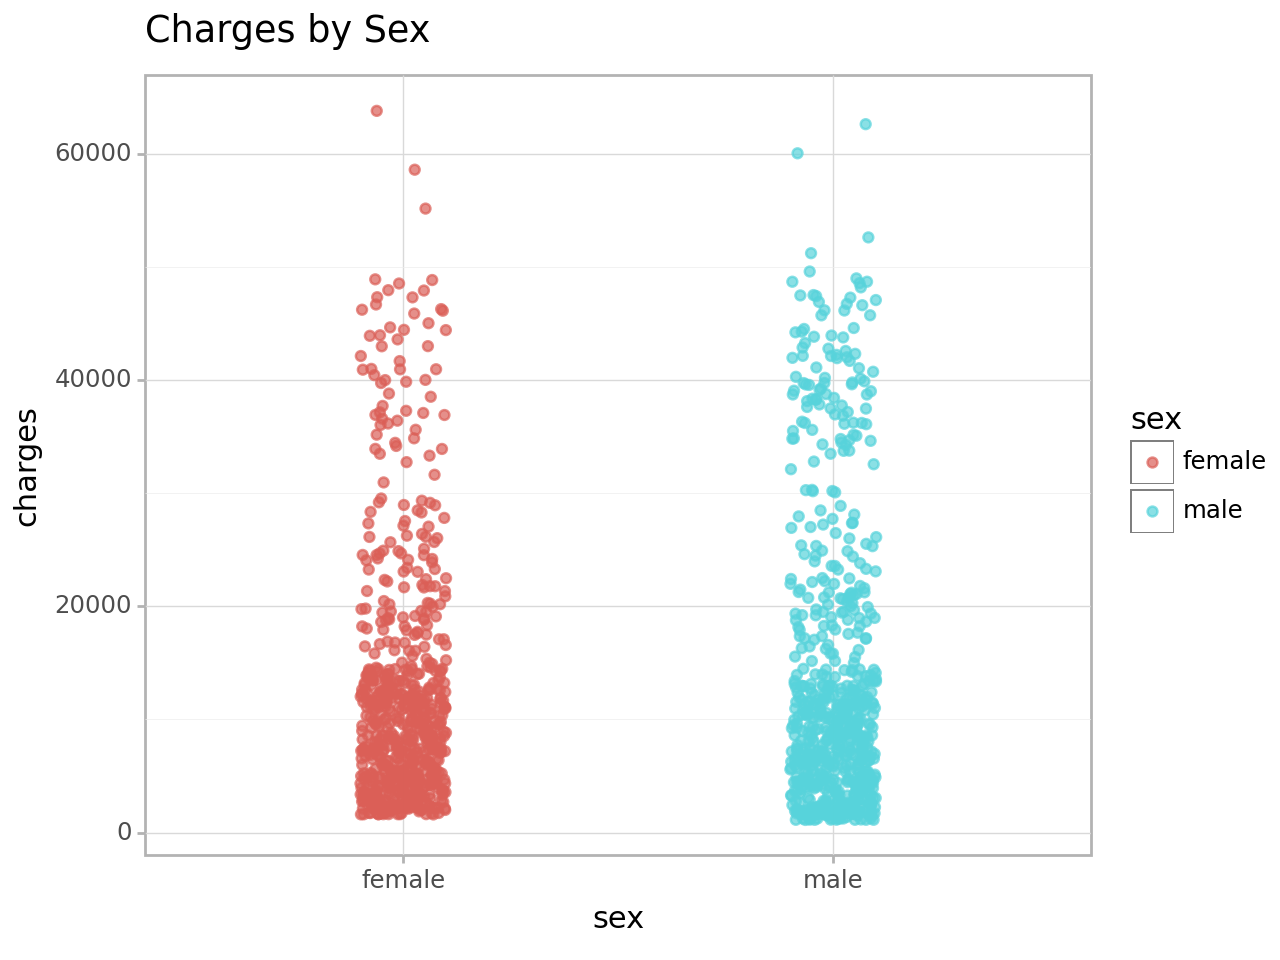

<Figure Size: (640 x 480)>

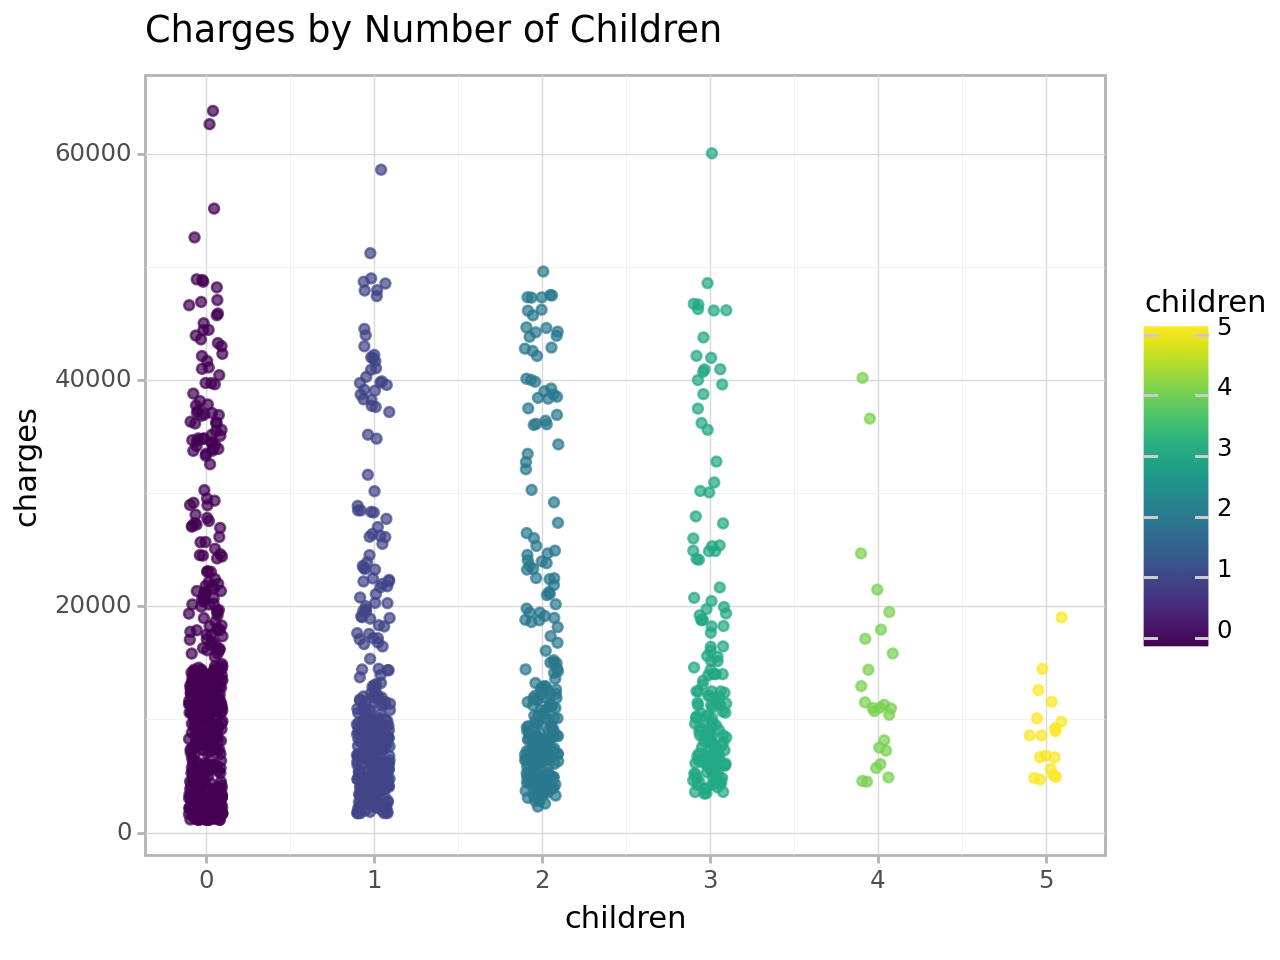

<Figure Size: (640 x 480)>

In [21]:

# Create the plots using plotnine
plot_sex = (ggplot(data, aes('sex', 'charges', color='sex')) +
            geom_jitter(width=0.1, alpha=0.7) +
            theme_light() +
            ggtitle("Charges by Sex"))

plot_children = (ggplot(data, aes('children', 'charges', color='children')) +
                 geom_jitter(width=0.1, alpha=0.7) +
                 theme_light() +
                 ggtitle("Charges by Number of Children"))
display(plot_sex)
display(plot_children)


### 3. Correlation between Charges and Smoker / Region

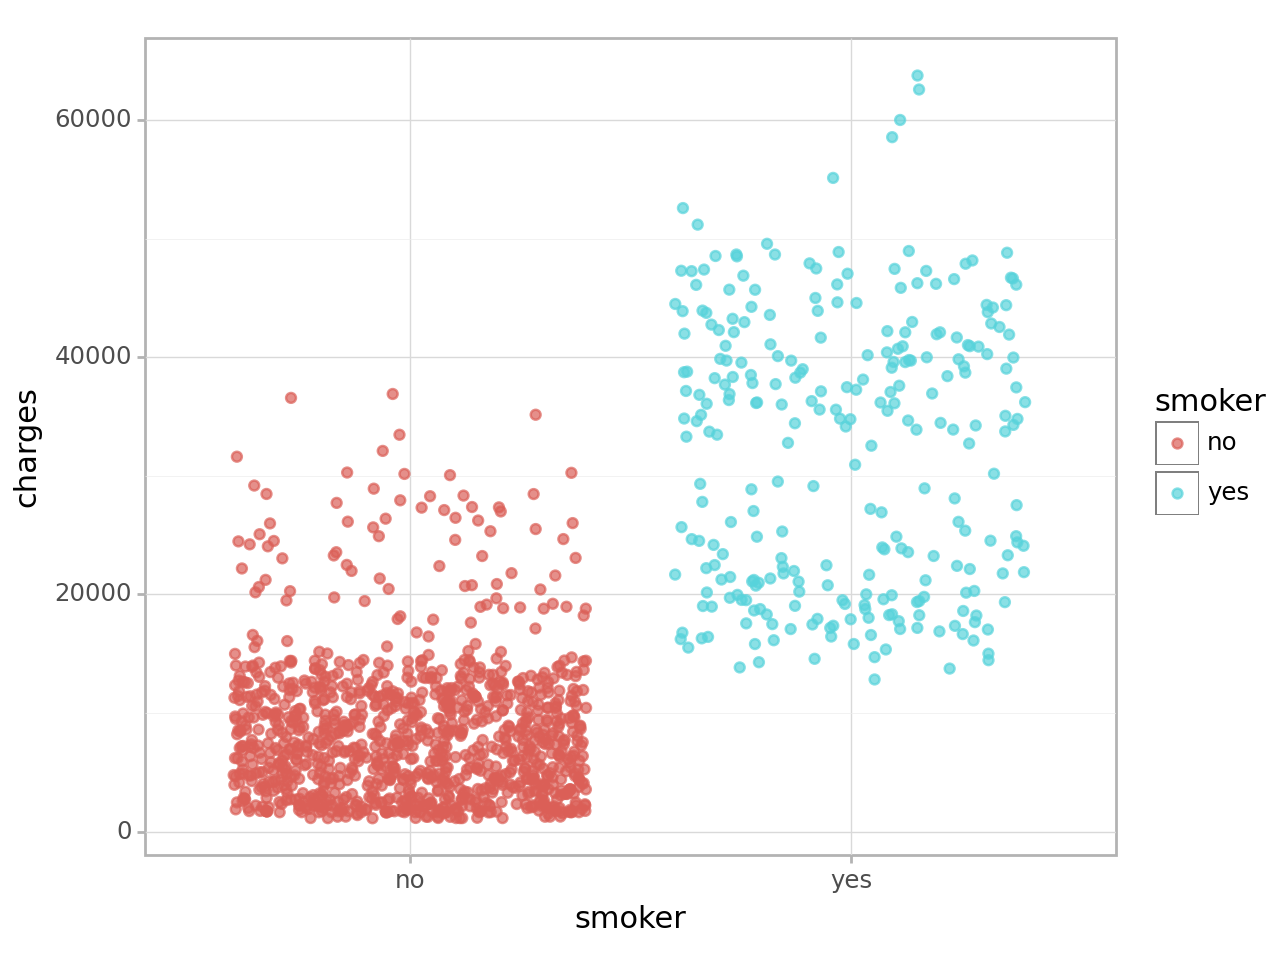

<Figure Size: (640 x 480)>

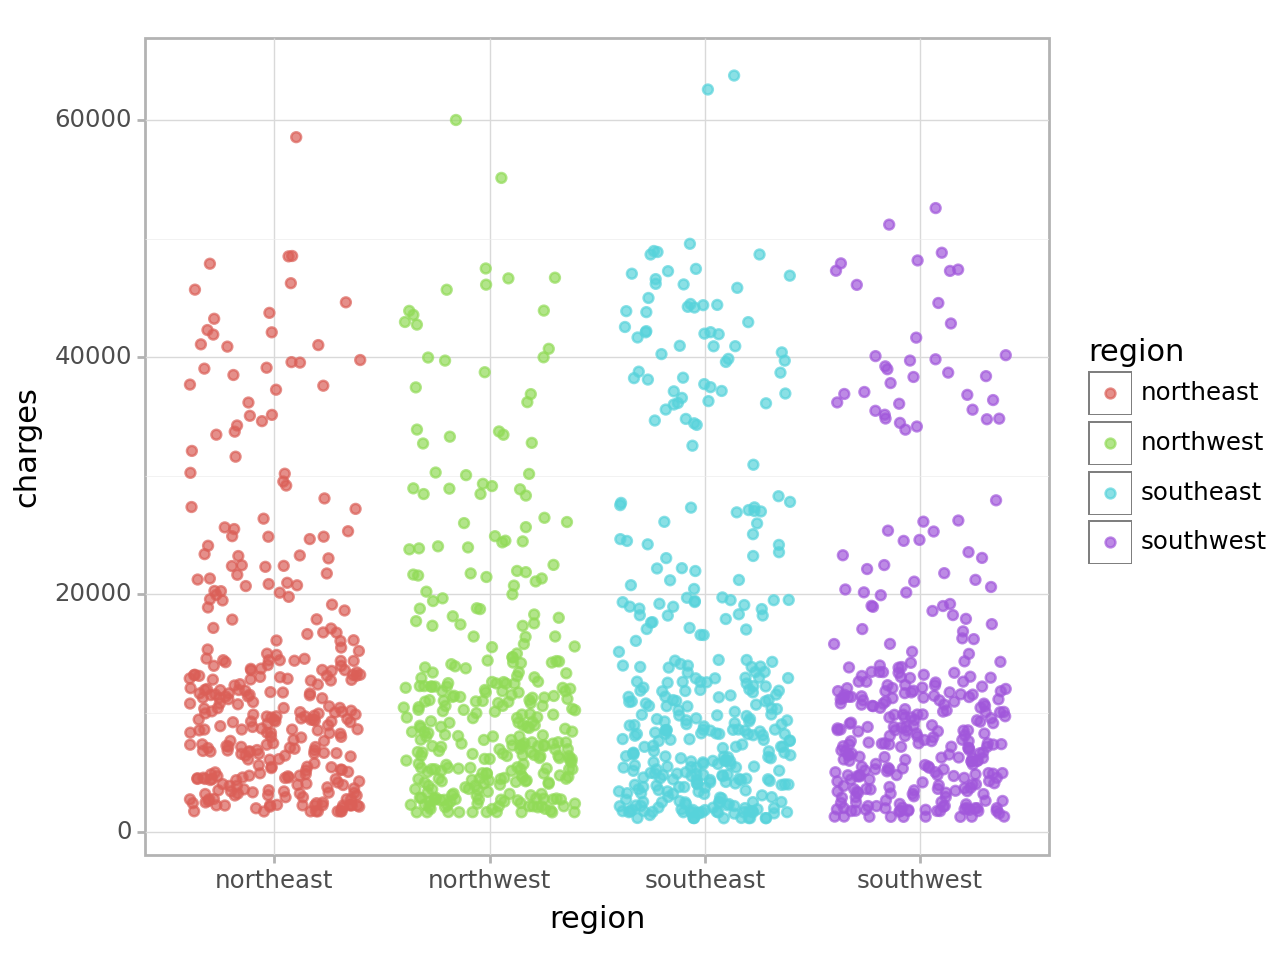

<Figure Size: (640 x 480)>

In [22]:
# Plot 3: Charges and Smoker / Region
p5 = (ggplot(data, aes('smoker', 'charges', color='smoker')) +
      geom_jitter(alpha=0.7) +
      theme_light())
p6 = (ggplot(data, aes('region', 'charges', color='region')) +
      geom_jitter(alpha=0.7) +
      theme_light())

display(p5)
display(p6)


* **Plot 1**: As Age and BMI go up Charges for health insurance also trends up.

* **Plot 2**: No obvious connection between Charges and Age. Charges for insurance with 4-5 chilren covered seems to go down (doesn't make sense, does it?)

* **Plot 3**: Charges for Smokers are higher for non-smokers (no surprise here). No obvious connection between Charges and Region.


## Linear Regression Model
### Splitting the Data:



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
train_data, test_data = train_test_split(data_encoded, train_size=0.8, random_state=123)


## Train the Model

In [24]:

# Automatically select all columns except the target as features
target = 'charges'
features = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']



# Train the model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

LinearRegression()

### Model Evaluation:



In [25]:
predictions = model.predict(test_data[features])
mse = mean_squared_error(test_data['charges'], predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 5527.42593044226


As we can see, summary of a model showed us that some of the variable are not significant (sex), while smoking seems to have a huge influence on charges. Training a model without non-significant variables and check if performance can be improved.

### Training and Testing the New Model


In [26]:
features_ = ['age', 'bmi', 'children','smoker_yes', 'region_northeast', 'region_northwest', 'region_southwest']

model_1 = LinearRegression()
model_1.fit(train_data[features_], train_data['charges'])

predictions_1 = model_1.predict(test_data[features_])
mse_1 = mean_squared_error(test_data['charges'], predictions_1)
rmse_1 = np.sqrt(mse_1)
print(f"RMSE for the new model: {rmse_1:.2f}")


RMSE for the new model: 5528.47


### Comparing Models


In [27]:
from sklearn.metrics import r2_score

r2_0 = r2_score(test_data['charges'], predictions)
r2_1 = r2_score(test_data['charges'], predictions_1)

print(f"R-squared for first model: {r2_0:.4f}")
print(f"R-squared for new model: {r2_1:.4f}")
print(f"RMSE for first model: {rmse:.2f}")
print(f"RMSE for new model: {rmse_1:.2f}")


R-squared for first model: 0.8002
R-squared for new model: 0.8001
RMSE for first model: 5527.43
RMSE for new model: 5528.47


As we can see, performance is quite similar between two models so I will keep the new model since it’s a little bit simpler.


### Model Performance Visualization


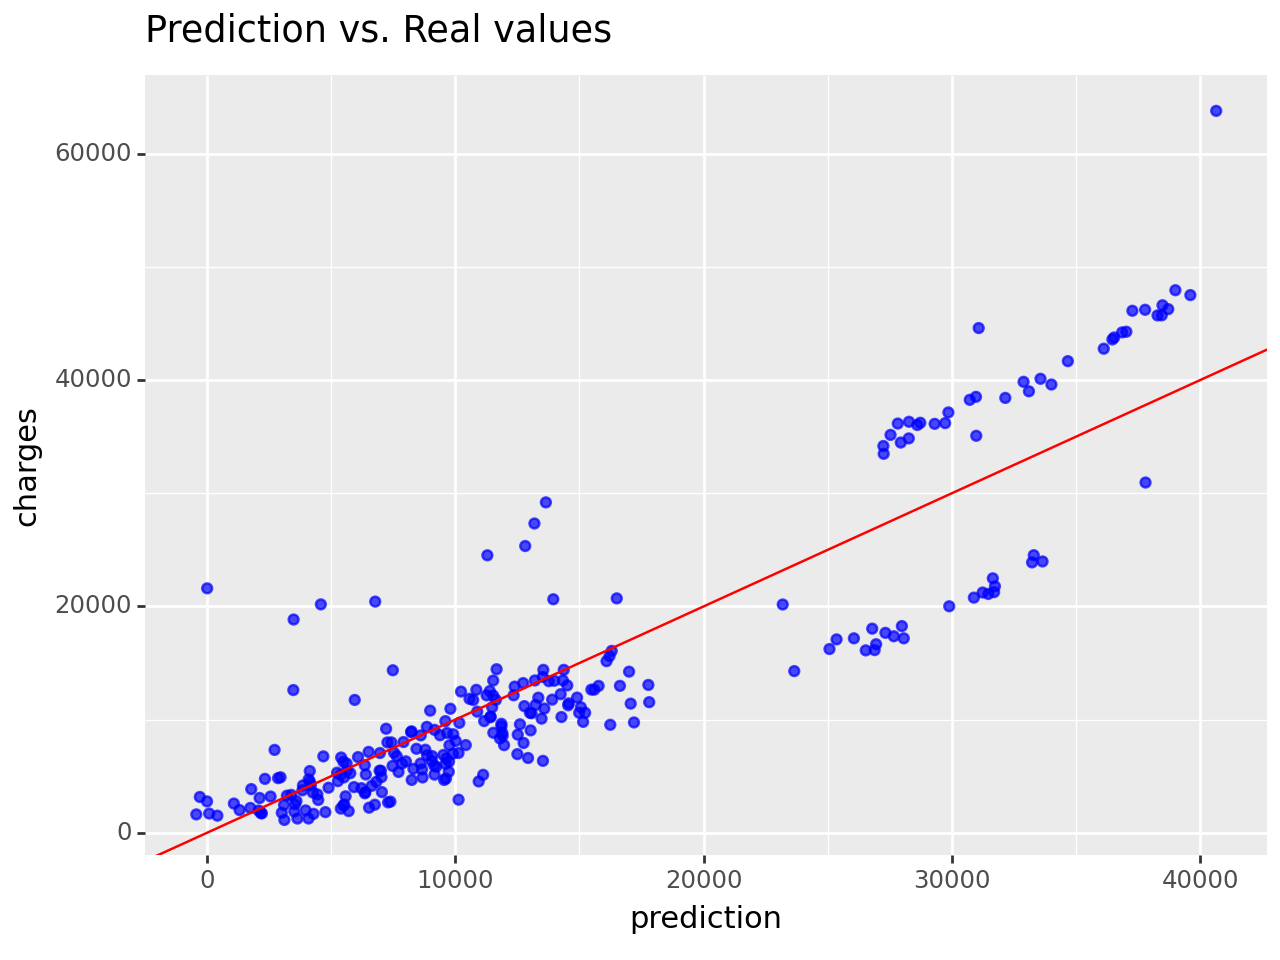

<Figure Size: (640 x 480)>

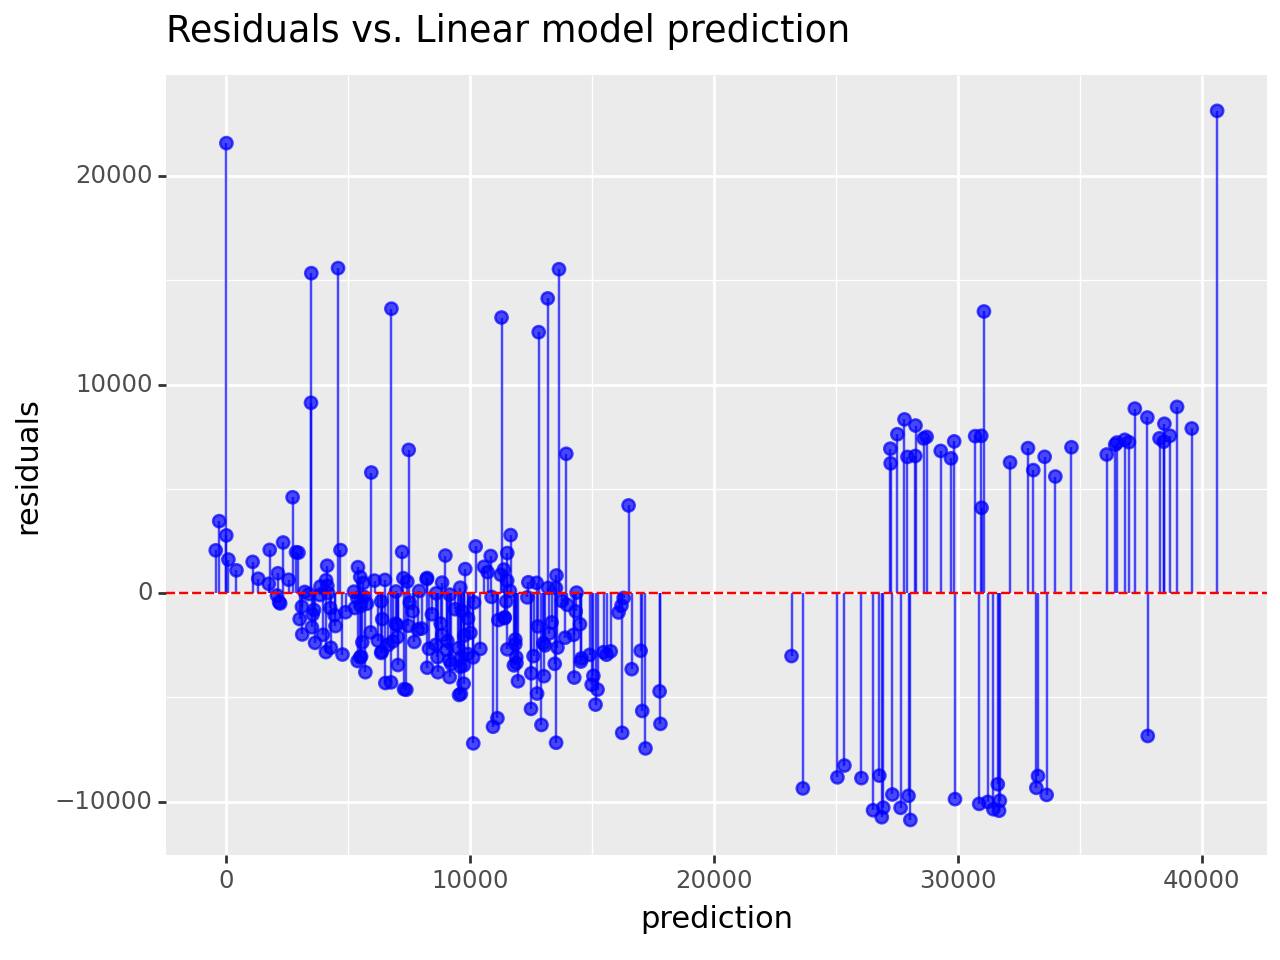

<Figure Size: (640 x 480)>

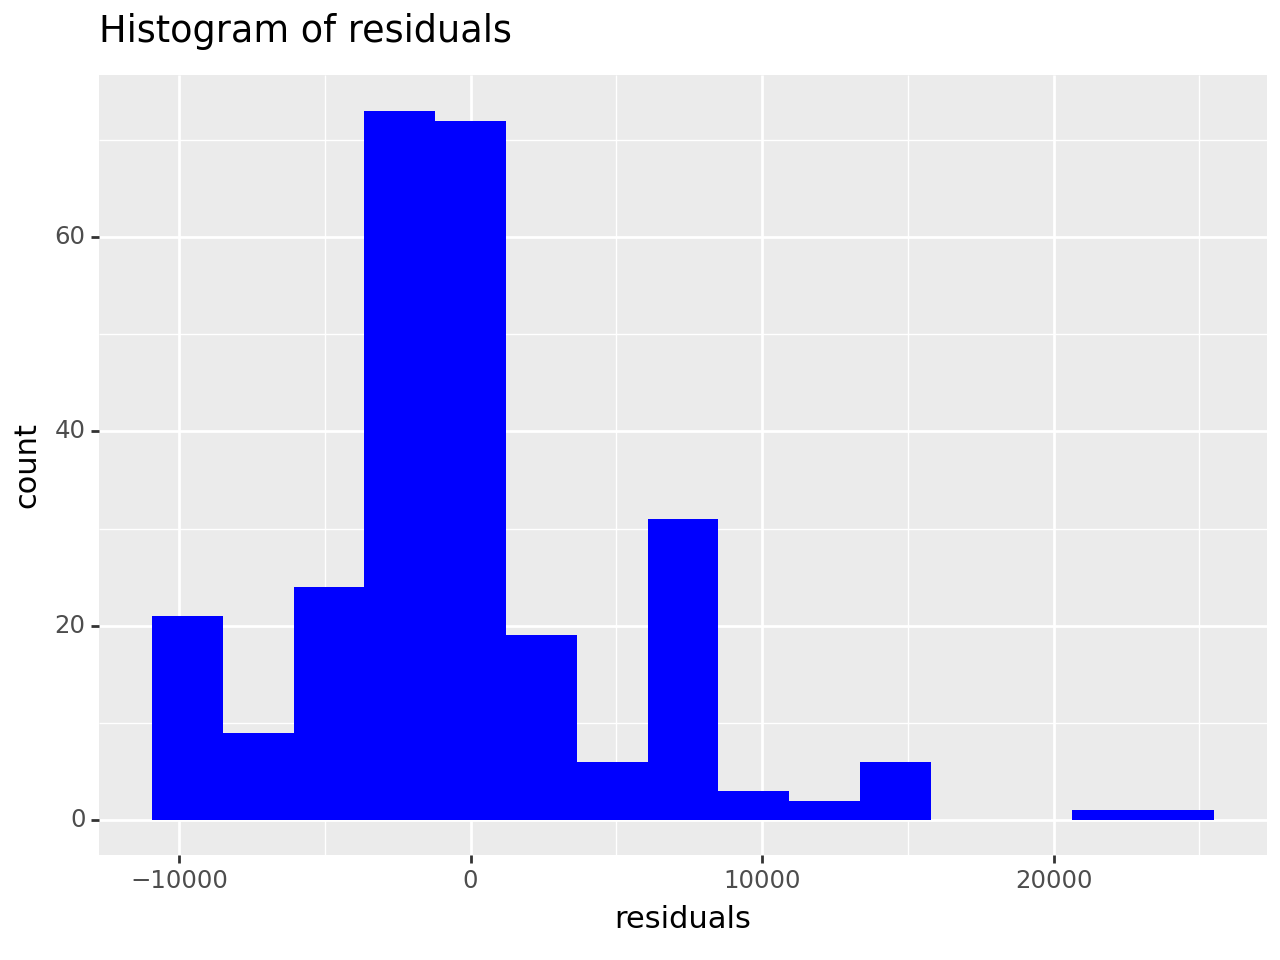

<Figure Size: (640 x 480)>

In [28]:
test_data['prediction'] = predictions_1
test_data['residuals'] = test_data['charges'] - test_data['prediction']

p7 = (ggplot(test_data, aes('prediction', 'charges')) +
      geom_point(color="blue", alpha=0.7) +
      geom_abline(color="red") +
      ggtitle("Prediction vs. Real values"))

p8 = (ggplot(test_data, aes('prediction', 'residuals')) +
      geom_pointrange(aes(ymin=0, ymax='residuals'), color="blue", alpha=0.7) +
      geom_hline(yintercept=0, linetype='dashed', color="red") +  # Corrected linetype here
      ggtitle("Residuals vs. Linear model prediction"))

p9 = (ggplot(test_data, aes('residuals')) +
      geom_histogram(bins=15, fill="blue") +
      ggtitle("Histogram of residuals"))

# Display the plots
display(p7)
display(p8)
display(p9)

## Applying on New Data

Let’s imagine 3 different people and see what charges on health care will be for them.

Bob: 19 years old, BMI 27.9, has no children, smokes, from northwest region.

Lisa: 40 years old, BMI 50, 2 children, doesn’t smoke, from southeast region.

John: 30 years old. BMI 31.2, no children, doesn’t smoke, from northeast region.


In [29]:

bob = pd.DataFrame({
    'age': [19],
    'bmi': [27.9],
    'children': [0],
    'sex_female': [0], # Include both 'sex_female' and 'sex_male' columns
    'sex_male': [1],
    'smoker_no': [0], # Include both 'smoker_yes' and 'smoker_no' columns
    'smoker_yes': [1],
    'region_northeast': [0], # Include all region columns
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

lisa = pd.DataFrame({
    'age': [40],
    'bmi': [50],
    'children': [2],
    'smoker_yes': [0],
    'region_northeast': [0],
    'region_northwest': [0],
    'region_southwest': [0]
})

john = pd.DataFrame({
    'age': [30],
    'bmi': [31.2],
    'children': [0],
    'smoker_yes': [0],
    'region_northeast': [1],
    'region_northwest': [0],
    'region_southwest': [0]
})

# Predict and print
bob_charge = model.predict(bob)
lisa_charge = model_1.predict(lisa)
john_charge = model_1.predict(john)

print(f"Health care charges for Bob: {bob_charge[0]:.2f}")
print(f"Health care charges for Lisa: {lisa_charge[0]:.2f}")
print(f"Health care charges for John: {john_charge[0]:.2f}")


Health care charges for Bob: 25585.85
Health care charges for Lisa: 15349.25
Health care charges for John: 6488.48
